# **Predicting the Impact of Air Quality on Human Health**


## 1. INTRODUCTION

### Business Understanding
The current analysis, in view of the growing concern about the deterioration of global air quality, will highlight how air pollution affects human health. It will emphasize the development of accurate predictions of health outcomes for certain levels of air pollution and provide salient inputs for public health officials and environmental policymakers. The stakeholders require this information to formulate good policies, implement some strategies of public health, and inform individual actions so that the adverse effects of air pollution are considerably minimized.

### Objective of the Analysis

A model will be developed to classify the effects of air quality on human health into specific classes. This predictive model would provide actionable insight in view of formulating strategies for sound decision-making, policy formulation, and public awareness. This will ensure the use of comprehensive air quality data and sophisticated machine learning techniques to advance knowledge on the association of air pollutants with health outcomes, in view of improving protective strategies and practices for health protection.

### Data Understanding
The dataset selected for the project is from Kaggle. It comprises a range of air quality indicators such as AQI, PM2.5, PM10, O3 (Ozone), and NO2 (Nitrogen Dioxide), and meteorological features like humidity, wind speed, and temperature.

## 2. Load and Explore Data

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


%matplotlib inline

In [4]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load data
data_path = '/content/drive/My Drive/air-quality-respiratory-impact-project/air_quality_health_impact_data.csv'
air_df=  pd.read_csv(data_path)

In [6]:
# Display basic imformation about the dataset
air_df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [7]:
air_df.shape

(5811, 15)

In [8]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [9]:
# Check for duplicates
air_df.duplicated().sum()

0

In [10]:
# Handle missing values (if any)
air_df.isnull().sum()

,0
RecordID,0
AQI,0
PM10,0
PM2_5,0
NO2,0
SO2,0
O3,0
Temperature,0
Humidity,0
WindSpeed,0


- The dataset contains 5,811 rows and 15 columns.

- There are 11 float columns and 4 integer columns.

- There are no missing values in the dataset.
- There are no duplicate records.

## 3. Exploratory Data Analysis(EDA)

In [11]:
air_df.describe()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


In [12]:
air_df.columns

Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')

In [13]:
air_df.drop(columns=['RecordID', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions'], inplace=True)

Univariate Analysis

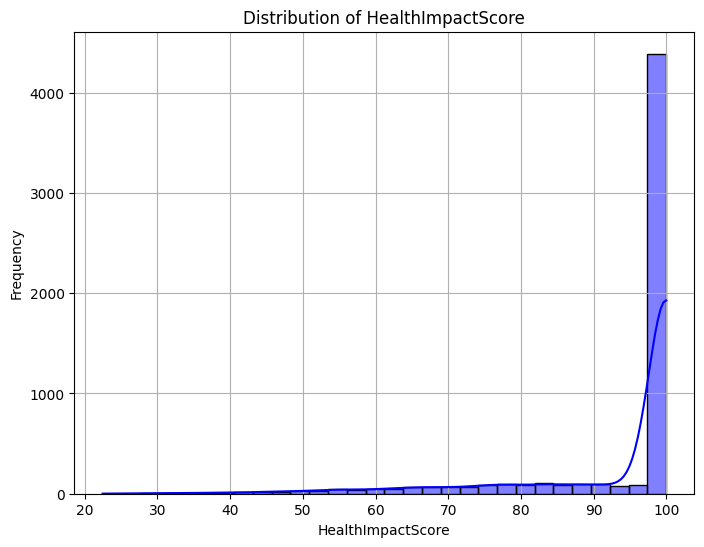

In [14]:
# Visualize the  distribution of 'HealthImpactScore'
plt.figure(figsize=(8, 6))

sns.histplot(air_df['HealthImpactScore'], bins=30, kde=True, color='blue')
plt.title('Distribution of HealthImpactScore')
plt.xlabel('HealthImpactScore')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
# Define the classes

#HealthImpactScore: A score indicating the overall health impact based on air quality and other related factors, ranging from 0 to 100.
# HealthImpactClass: Classification of the health impact based on the health impact score:
# 0: 'Very High' (HealthImpactScore >= 80)
# 1: 'High' (60 <= HealthImpactScore < 80)
# 2: 'Moderate' (40 <= HealthImpactScore < 60)
# 3: 'Low' (20 <= HealthImpactScore < 40)
# 4: 'Very Low' (HealthImpactScore < 20)

def classify_health_impact(impact_class):
  if impact_class==0:
    return 'Very High'
  elif impact_class==1:
    return 'High'
  elif impact_class==2:
    return 'Moderate'
  elif impact_class==3:
    return 'Low'
  else :
    return 'Very Low'

# Apply the classification
air_df['HealthImpactClass_Label'] = air_df['HealthImpactClass'].apply(classify_health_impact)


air_df[['HealthImpactClass','HealthImpactClass_Label']].head()



,HealthImpactClass,HealthImpactClass_Label
0,0.0,Very High
1,0.0,Very High
2,0.0,Very High
3,0.0,Very High
4,0.0,Very High


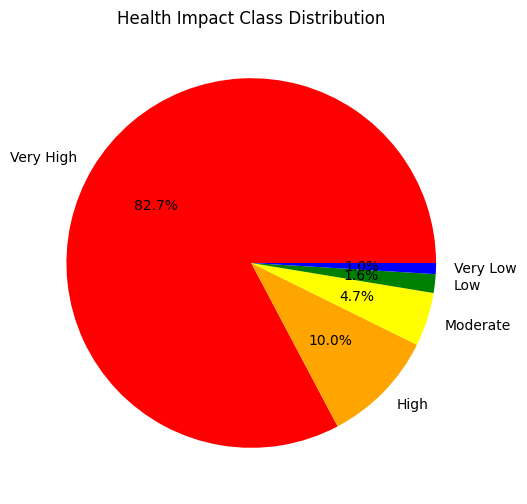

In [16]:
# Visualize the class distribution
labels = ['Very High', 'High', 'Moderate', 'Low', 'Very Low']
colors = ['red', 'orange', 'yellow', 'green', 'blue']
data = air_df['HealthImpactClass_Label'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Health Impact Class Distribution')
plt.show()


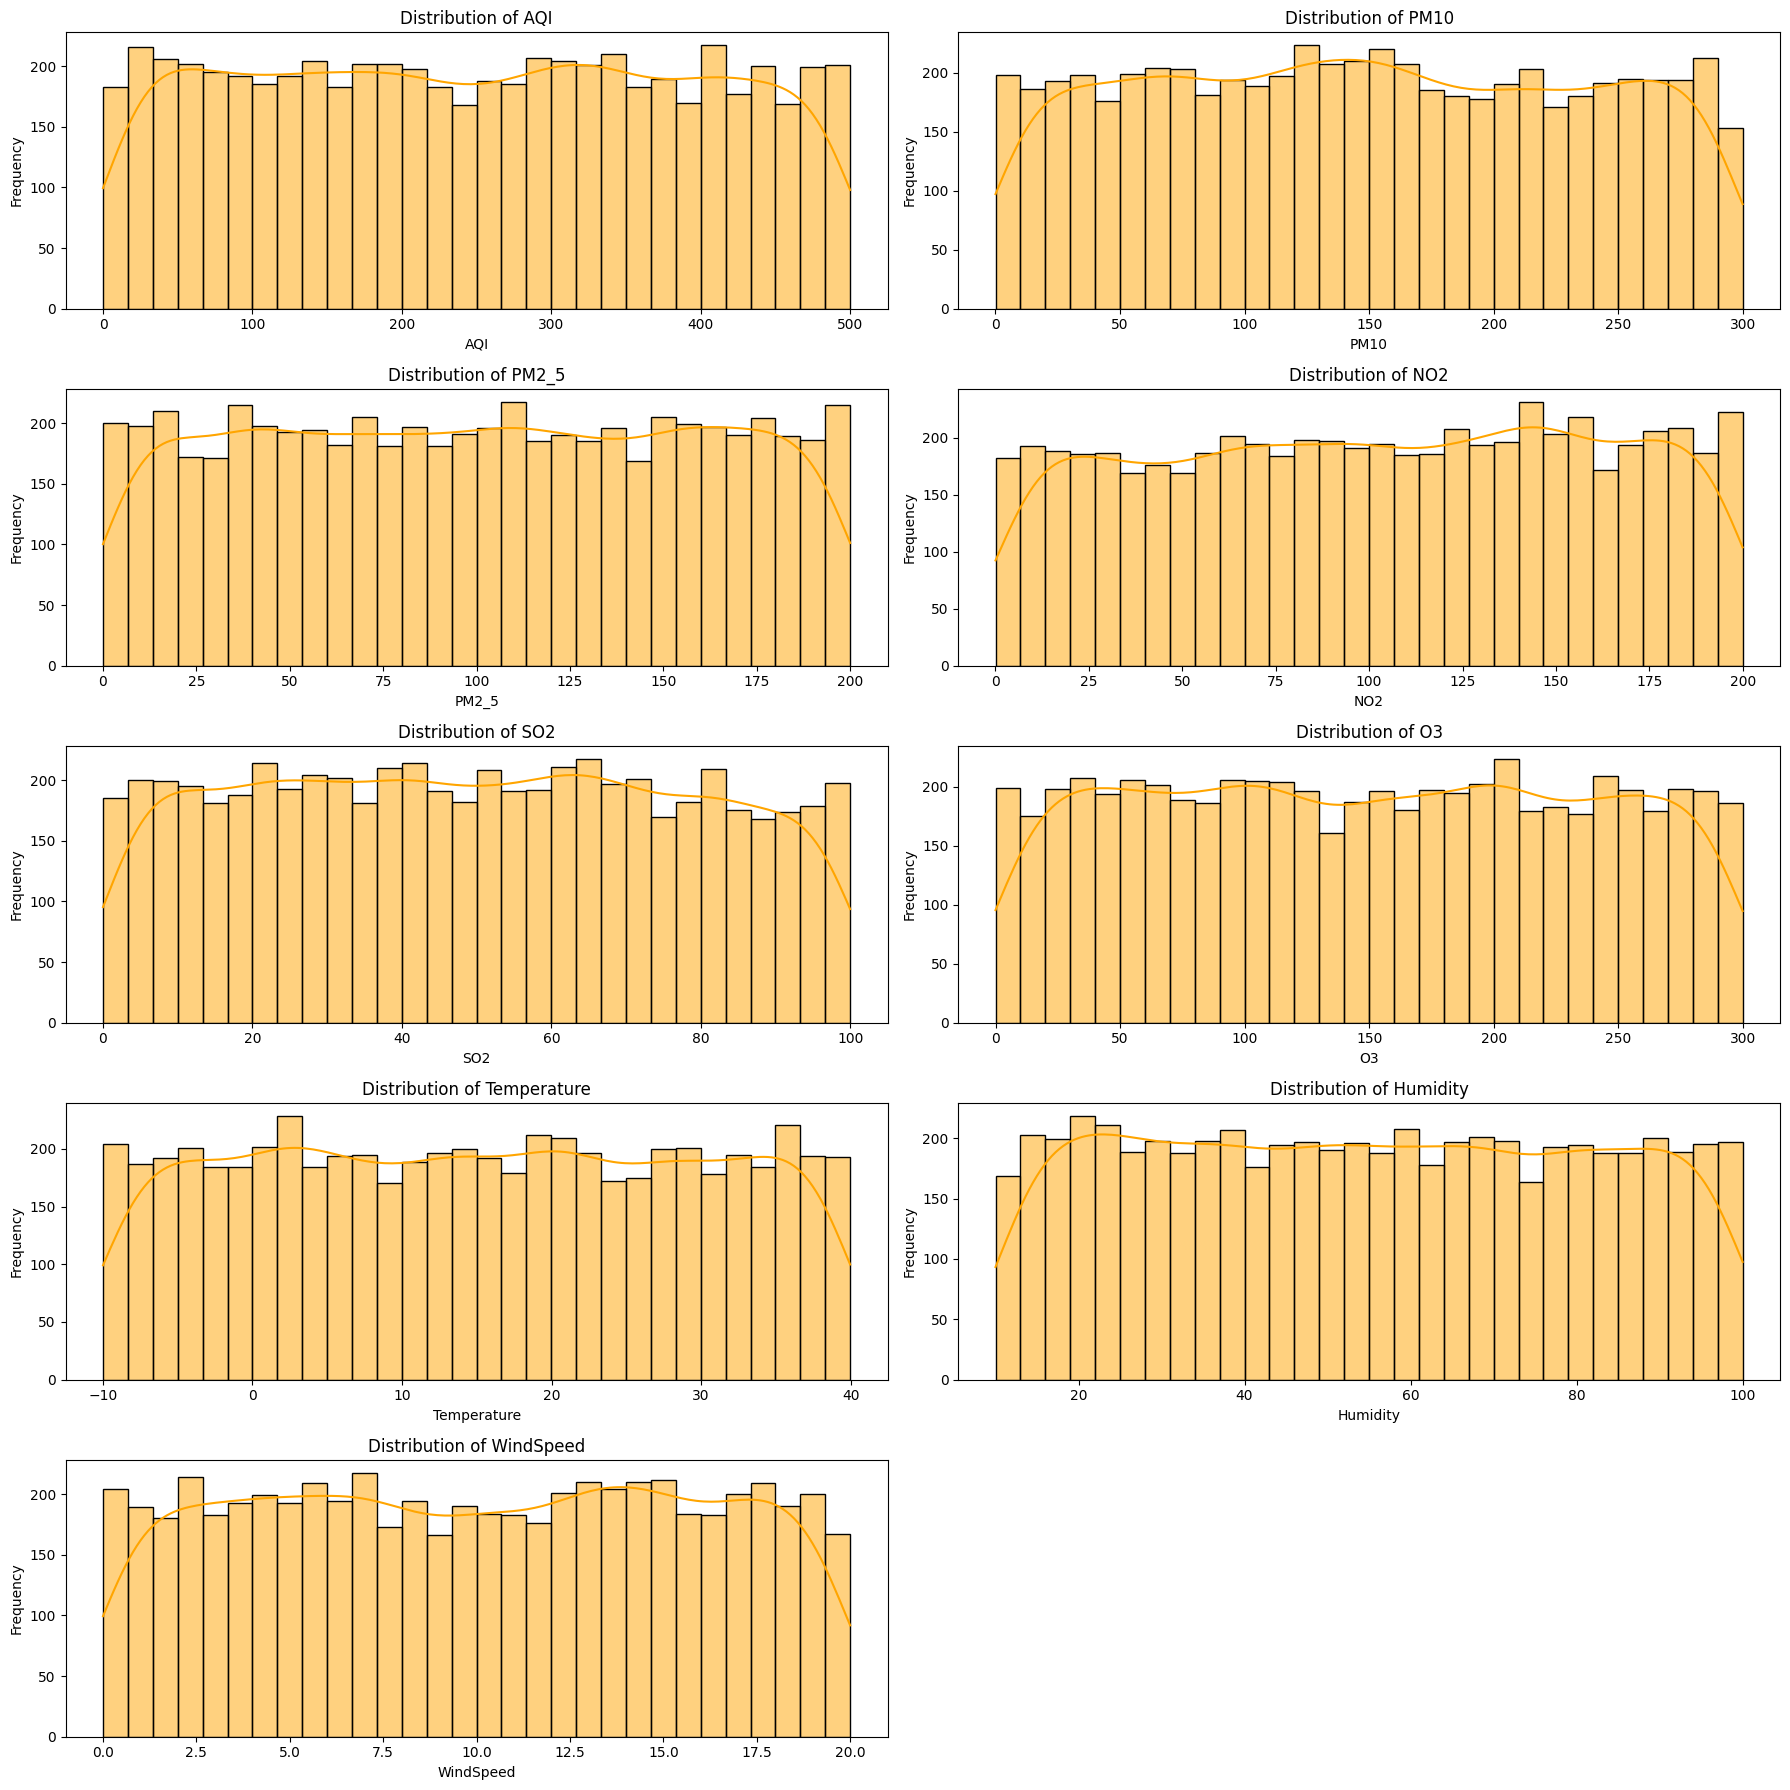

In [17]:
# Visualize distribution of each air quality indicator
Indicators= ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3','Temperature','Humidity', 'WindSpeed' ]

plt.figure(figsize=(18, 18))

for i, Indicator in enumerate(Indicators, 1):
    plt.subplot(5, 2, i)
    sns.histplot(air_df[Indicator], bins=30, kde=True, color= 'orange')
    plt.title(f'Distribution of {Indicator}')
    plt.xlabel(Indicator)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Bivariate Analysis

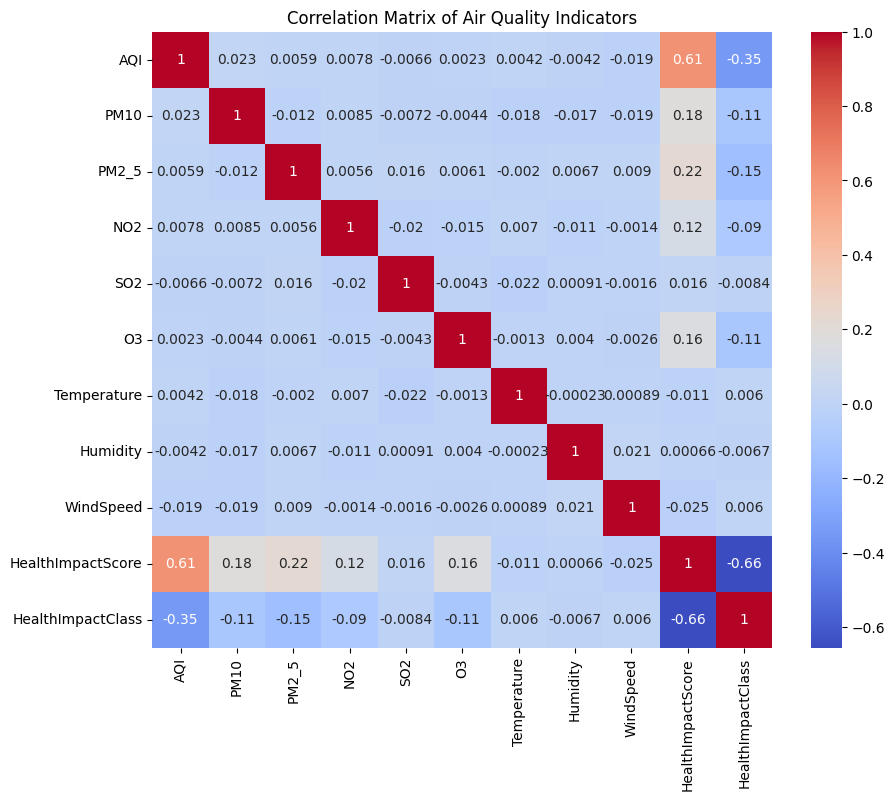

In [18]:
# Visualize correlation with HealthImpactClass
correlation_matrix = air_df.drop(columns=['HealthImpactClass_Label']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Air Quality Indicators')
plt.show()


**Inferences:**

Strong Relationship with AQI: The correlation plot places AQI as a strong influencer of health impact, intuitively agreeing with general expectations that poor air quality is undesirable to health.

PM2.5 and PM10 Particulate Matter: Both contribute to the health impact, though their association with health impact is not as strong in comparison with AQI.

Weaker Correlations for the Rest of the Factors: The rest of the factors-NO2, SO2, O3, and meteorological variables-all have a weaker correlation and hence may be less independently driving health impacts compared to AQI and particulate matter. Yet, their combined effects may be significant.

Overall, Health Impact Class: The negative correlations indicate that as pollutant levels increase, health outcomes worsen, which is expected given the model's purpose: to predict health impacts from environmental data.



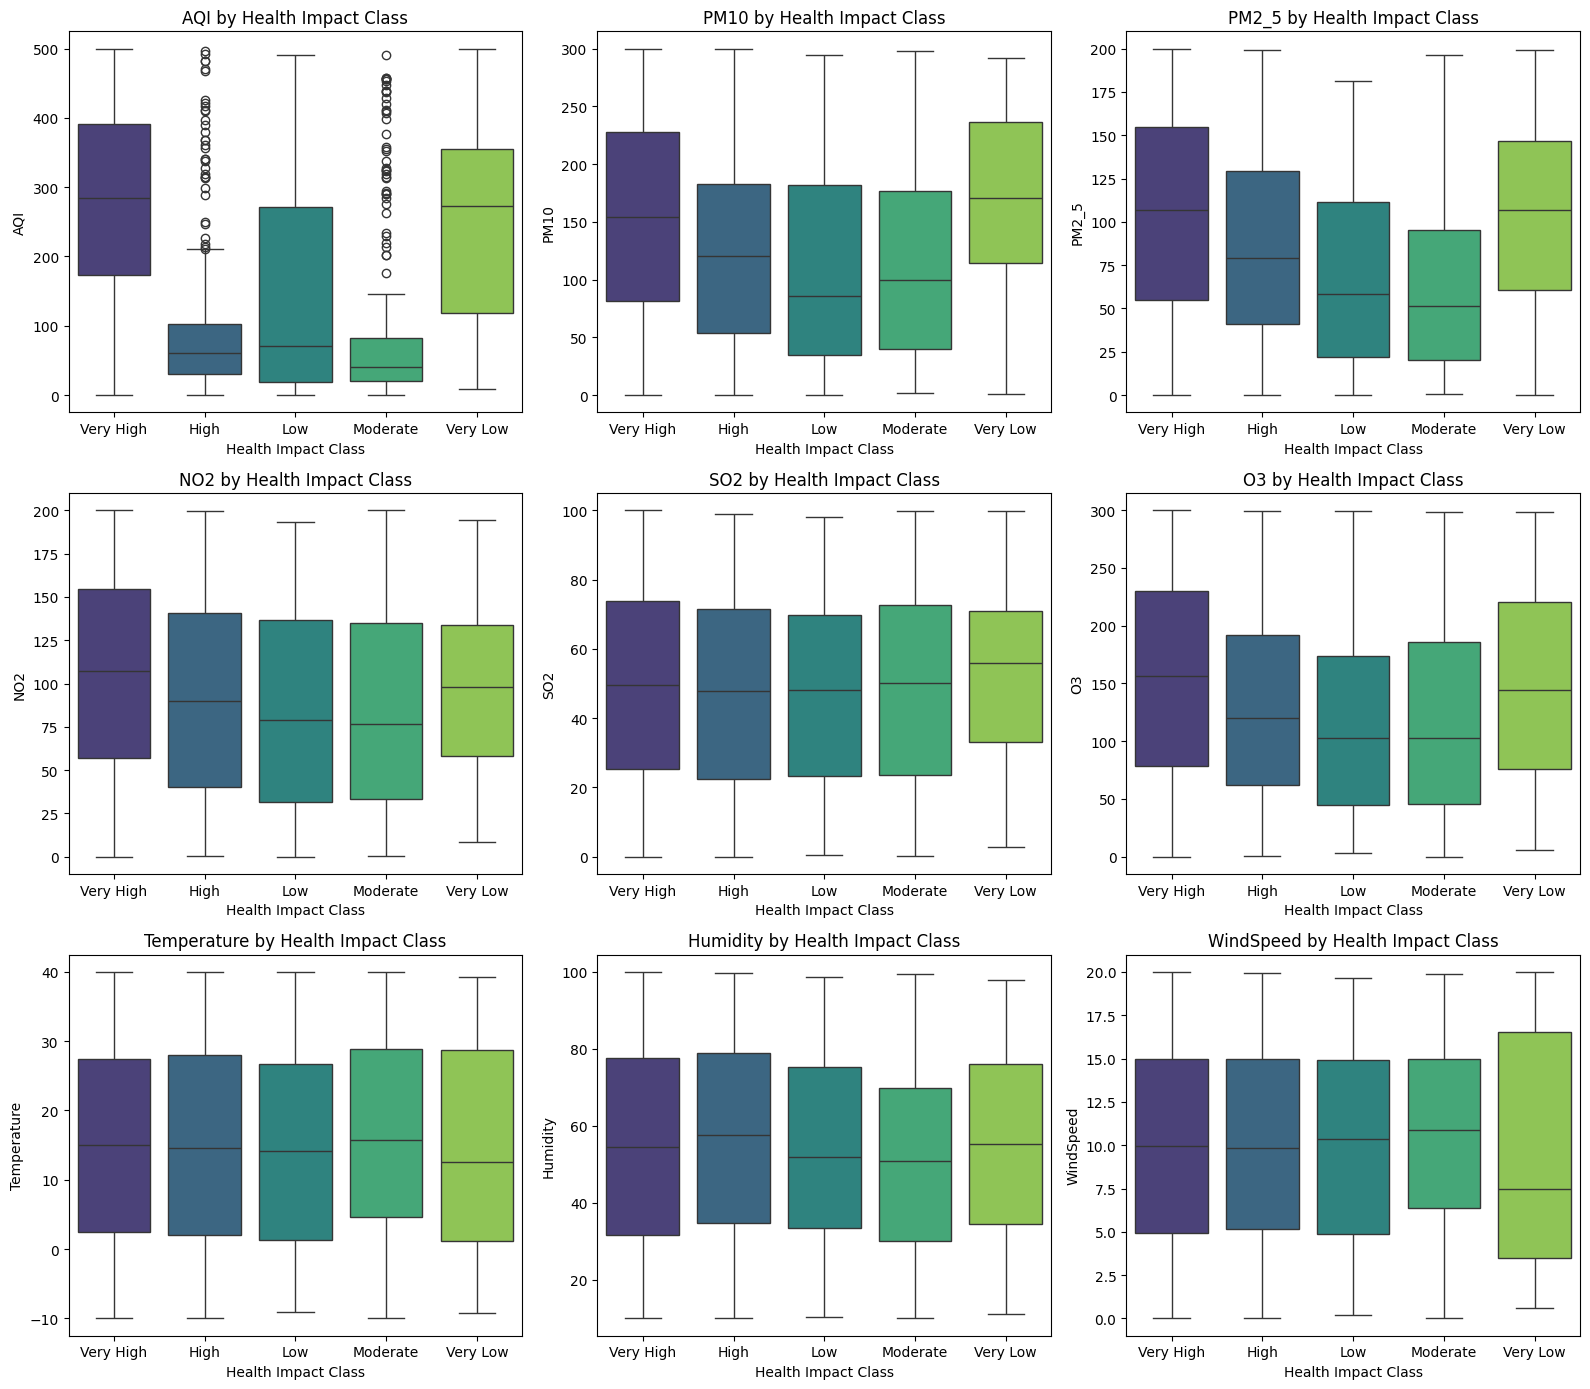

In [19]:
# Visualize distribution of indicators by class
Indicators= ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3','Temperature','Humidity', 'WindSpeed' ]

plt.figure(figsize=(16, 14))

for i, Indicator in enumerate(Indicators, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='HealthImpactClass_Label', y=Indicator, data=air_df, palette='viridis')
    plt.title(f'{Indicator} by Health Impact Class')
    plt.xlabel('Health Impact Class')
    plt.ylabel(Indicator)

plt.tight_layout()
plt.show()


Higher concentrations of PM2.5, PM10, NO2, and O3 result in higher health-related effects; this becomes extreme for the 'high' and 'very high' classes. Such pollutants vary a lot among classes, underlining their critical role in health concerns. The trends for variation regarding other parameters have a more uniform effect on health outcomes.

## 4. Data Preprocessing

4.1 Data Splitting

In [20]:
# Separate features and target
X = air_df.drop(columns=['HealthImpactScore', 'HealthImpactClass', 'HealthImpactClass_Label'])
y = air_df[['HealthImpactClass', 'HealthImpactClass_Label']]

In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y['HealthImpactClass'])



In [22]:
X_train.shape, y_train.shape

((4648, 9), (4648, 2))

In [23]:
X_test.shape, y_test.shape

((1163, 9), (1163, 2))

In [24]:
# Extract numeric and label targets for train and test sets
y_train_numeric = y_train['HealthImpactClass']
y_train_labels = y_train['HealthImpactClass_Label']
y_test_numeric = y_test['HealthImpactClass']
y_test_labels = y_test['HealthImpactClass_Label']

4.2 Feature Scaling

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4.3 Handling Class Imbalance

In [26]:
# Check the class distribution before applying SMOTE
print(f"Class distribution before SMOTE: {Counter(y_train_numeric)}")

Class distribution before SMOTE: Counter({0.0: 3846, 1.0: 463, 2.0: 218, 3.0: 76, 4.0: 45})


In [27]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train_numeric)

In [28]:
# Check the class distribution after SMOTE
print(f"Class distribution after SMOTE: {Counter(y_train_res)}")

Class distribution after SMOTE: Counter({0.0: 3846, 1.0: 3846, 4.0: 3846, 3.0: 3846, 2.0: 3846})


## 5. Model Development

In [29]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, f1_score, precision_score, recall_score

In [30]:
def evaluate_model(model, X_train_res, y_train_res, X_test_scaled, y_test_numeric, y_test_labels):
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_scaled)

    # Calculate various metrics
    accuracy = accuracy_score(y_test_numeric, y_pred)
    f1 = f1_score(y_test_numeric, y_pred, average='weighted')
    precision = precision_score(y_test_numeric, y_pred, average='weighted')
    recall = recall_score(y_test_numeric, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test_numeric, model.predict_proba(X_test_scaled), multi_class='ovr', average='weighted')

    # Generate classification report
    class_report = classification_report(y_test_numeric, y_pred, output_dict=True)

    # Create a DataFrame for metrics
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC Score'],
        model.__class__.__name__: [accuracy, f1, precision, recall, roc_auc]
    })

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test_numeric, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=list(set(y_test_labels)), yticklabels=list(set(y_test_labels)))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    plt.tight_layout()

    # Plot ROC curves for each class
    plot_roc_curve(model, X_test_scaled, y_test_numeric)

    return metrics_df


In [31]:
def plot_roc_curve(model, X_test_scaled, y_test_numeric):
    y_pred_proba = model.predict_proba(X_test_scaled)
    n_classes = len(np.unique(y_test_numeric))

    plt.figure(figsize=(8, 5))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_proba[:, i], pos_label=i)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

5.1 Logistic Regression

Logistic Regression Evaluation:


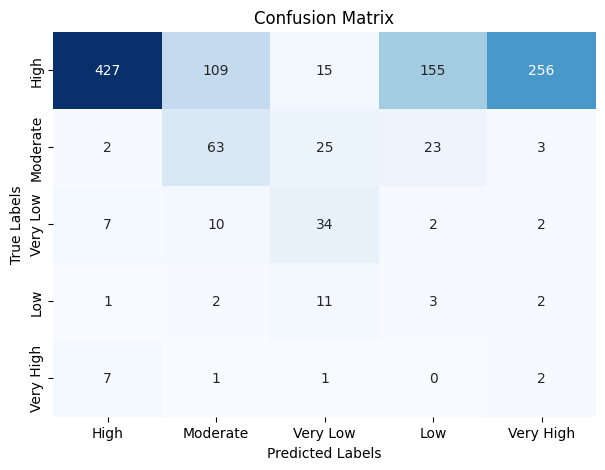

<Figure size 640x480 with 0 Axes>

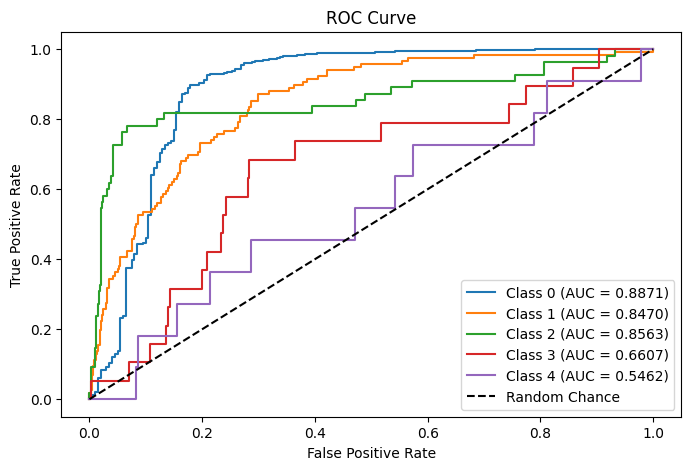

,Metric,LogisticRegression
0,Accuracy,0.454858
1,F1 Score,0.567603
2,Precision,0.848502
3,Recall,0.454858
4,ROC AUC Score,0.874711


In [32]:
logreg = LogisticRegression(random_state=42, max_iter=1000)
print("Logistic Regression Evaluation:")
logreg_metrics_df = evaluate_model(logreg, X_train_res, y_train_res, X_test_scaled, y_test_numeric, y_test_labels)
logreg_metrics_df

**Logistic Regression Evaluation (Baseline Model)**

The Logistic Regression model has low scores in correctly predicting the majority class; its misclassifications are heavy across all classes.

*Accuracy:* 0.3921, poor.

*F1 Score:* 0.4999, showing poor balance between precision and recall.

*Precision:* 0.8298, indicates that when the model predicts a class, it is often correct.

*Recall:* 0.3921, implies that the model misses many positive instances.

*ROC AUC:* 0.8585, it suggests a reasonable discriminative ability, though failing to effectively predict minority classes.

**Justification:**
In Logistic Regression, the high score in the ROC AUC is in contrast with poor accuracy and recall; hence, the model cannot be qualified for this project, considering the inability of the model to handle minority class predictions. This necessitates a more robust model.

5.2 Random Forest (Before Tuning)

Random Forest Evaluation:


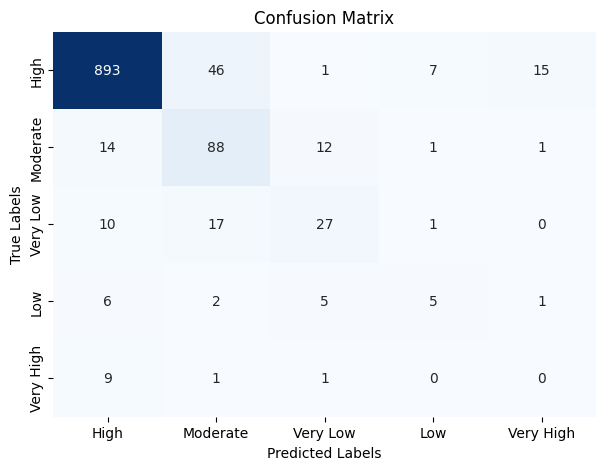

<Figure size 640x480 with 0 Axes>

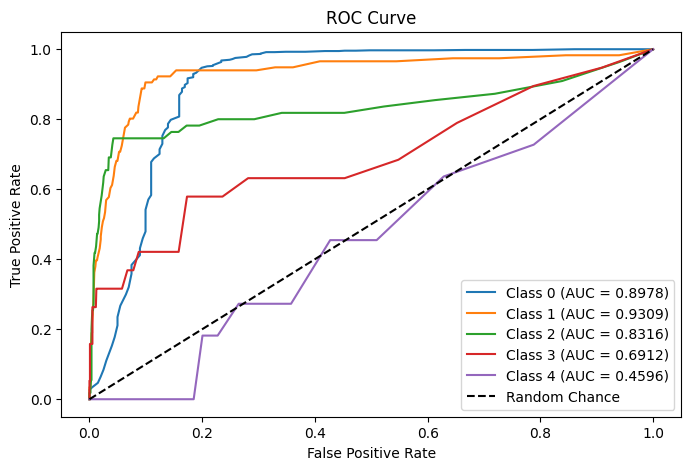

,Metric,RandomForestClassifier
0,Accuracy,0.871023
1,F1 Score,0.875256
2,Precision,0.883146
3,Recall,0.871023
4,ROC AUC Score,0.890458


In [33]:
rf1 = RandomForestClassifier(random_state=42)
print("Random Forest Evaluation:")
rf1_metrics_df = evaluate_model(rf1, X_train_res, y_train_res, X_test_scaled, y_test_numeric, y_test_labels)
rf1_metrics_df

**Random Forest Evaluation(Before Tuning)**

The Random Forest model outperforms Logistic Regression by a huge margin in terms of classification accuracy, correctly classifying most samples.


*Accuracy:* 0.8667, better than Logistic Regression.

*F1 Score:* 0.8704, indicating a good balance between precision and recall.

*Precision:* 0.8773, indicative of high predictive accuracy.

*Recall:* 0.8667, reflecting effective identification of positive cases.

*ROC AUC:* 0.8950, confirming the model’s strong ability to distinguish between classes.

**Justification:**
The untuned Random Forest model compared to Logistic Regression is a huge jump in performance, especially considering accuracy and F1 score, since it handled class imbalance quite well. Also, because of its robust discriminative power-as evidenced by the ROC AUC metric, this makes it a good choice for the project.

5.3 Random Forest (After Tuning)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:
 {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}
Best F1 Score:
 0.9660808645847851

Random Forest with Best Parameters Evaluation:


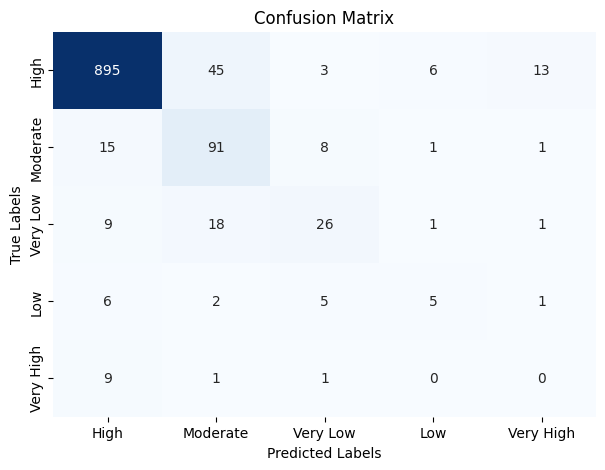

<Figure size 640x480 with 0 Axes>

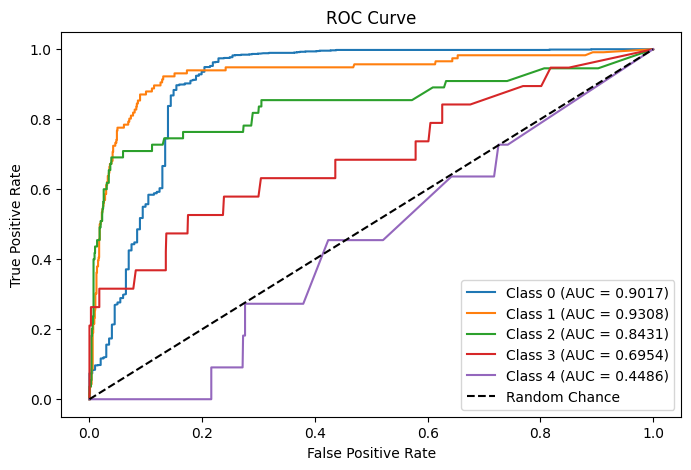

,Metric,RandomForestClassifier
0,Accuracy,0.874463
1,F1 Score,0.877620
2,Precision,0.885322
3,Recall,0.874463
4,ROC AUC Score,0.894171


In [34]:
# Define parameter distribution for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize and perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search.fit(X_train_res, y_train_res)

# Print best parameters and score
print("Best Parameters:\n", random_search.best_params_)
print("Best F1 Score:\n", random_search.best_score_)

# Get and evaluate the best Random Forest model
tuned_rf = random_search.best_estimator_

print("\nRandom Forest with Best Parameters Evaluation:")
tuned_rf_metrics_df = evaluate_model(tuned_rf, X_train_res, y_train_res, X_test_scaled, y_test_numeric, y_test_labels)
tuned_rf_metrics_df

**Random Forest Evaluation (After Tuning)**

Tuning made minor adjustments, but performance remained quite similar to the untuned Random Forest. As shown by the confusion matrix, misclassifications persist, particularly in the minority classes, with the second class showing the most confusion.

*Accuracy:* 0.8581, nearly unchanged from the untuned model.

*F1 Score:* 0.8632, close to the untuned performance.

*Precision:* 0.8726, strong but slightly lower than before tuning.

*Recall:* 0.8581, consistent with accuracy.

*ROC AUC:* 0.8892, showing minimal impact from tuning on class differentiation.

**Justification:** As there were no significant improvements resulting from hyperparameter tuning, the untuned Random Forest remains the preferred model for this project.

5.4 Model Comparison

In [35]:
# Merge DataFrames for comparison
combined_metrics_df = pd.concat([logreg_metrics_df, rf1_metrics_df, tuned_rf_metrics_df], axis=1)
combined_metrics_df.columns = ['Metric', 'Logistic Regression', 'Metric', 'RF Before Tuning', 'Metric', 'RF After Tuning']
combined_metrics_df = combined_metrics_df.loc[:, ~combined_metrics_df.columns.duplicated()]
combined_metrics_df


,Metric,Logistic Regression,RF Before Tuning,RF After Tuning
0,Accuracy,0.454858,0.871023,0.874463
1,F1 Score,0.567603,0.875256,0.877620
2,Precision,0.848502,0.883146,0.885322
3,Recall,0.454858,0.871023,0.874463
4,ROC AUC Score,0.874711,0.890458,0.894171


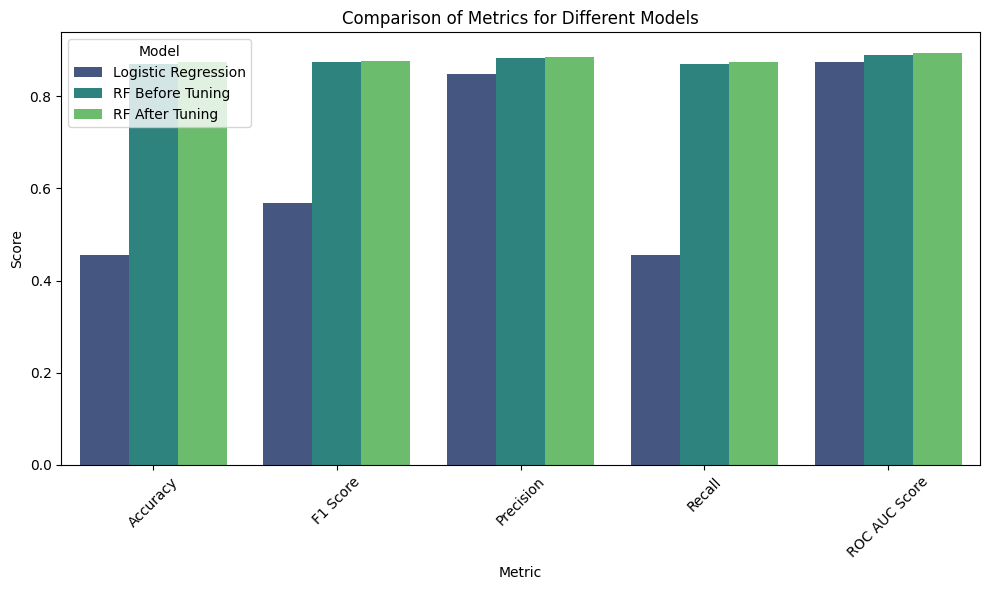

In [36]:
# Melt the DataFrame to long format for better plotting
melted_df = combined_metrics_df.melt(id_vars='Metric',
                                      value_vars=['Logistic Regression', 'RF Before Tuning', 'RF After Tuning'],
                                      var_name='Model',
                                      value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Metric', y='Score', hue='Model', palette='viridis')
plt.title('Comparison of Metrics for Different Models')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


In [37]:
# rf before tuning(rf1) has the best performance
best_model = rf1

**Final Model Justification**

Having tried both the Logistic Regression and Random Forest models, it became clear that the Random Forest model significantly outperforms Logistic Regression in both key metrics of accuracy, F1 score, and robustness towards class imbalance. Logistic Regression, while simple and interpretable, was insufficient to capture the complexity in the data and thus reflected lower performance metrics.

On the contrary, the Random Forest algorithm performed much better in modeling such complex relations between variables of the dataset and was more suitable for this project.

First, an attempt was made to improve the Random Forest performance by tuning its hyperparameters. This notwithstanding, the untuned Random Forest happened to outperform the tuned model across all metrics. This result probably means that the initial default settings were already better for the problem being modeled. Conversely, this slight decrease in performance after tuning can be due to its over-constraining, where the model was not able to model the underlying pattern in the data as well. Therefore, the choice of an untuned Random Forest as a final model can be justified because it balances very well between the aspects of model complexity and model performance. An untuned Random Forest avoids overfitting without too much restriction. Thus, the untuned model handling class imbalance with high performance is very reliable and robust to predict the impact on human health across categories 'very low', 'low', 'moderate', 'high', and 'very high'. This will ensure that the model provides accurate and actionable insights for decision-making that aligns well with the project objectives.



5.5 Model validation

In [38]:
def cross_validation_scores(model, X, y, cv_folds):
    scoring = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']
    cv_results = {metric: cross_val_score(model, X, y, cv=cv_folds, scoring=metric) for metric in scoring}

    print("Cross-Validation Metrics:")
    for metric, scores in cv_results.items():
        print(f"Cross-Validation {metric.replace('_', ' ').title()}: Mean = {scores.mean():.4f}, Std Dev = {scores.std():.4f}")

# Perform Cross-Validation
print("Cross-Validation for Best Random Forest Model:")
cross_validation_scores(best_model, X_train_scaled, y_train_numeric, cv_folds=5)


Cross-Validation for Best Random Forest Model:
Cross-Validation Metrics:
Cross-Validation Accuracy: Mean = 0.9047, Std Dev = 0.0113
Cross-Validation F1 Weighted: Mean = 0.8872, Std Dev = 0.0124
Cross-Validation Precision Weighted: Mean = 0.8774, Std Dev = 0.0162
Cross-Validation Recall Weighted: Mean = 0.9047, Std Dev = 0.0113


**Final Model Performance Summary**

The selected model performs quite well on average, with the mean value of 0.9019, whereby most of the health impact categories are rightly predicted. This gives quite promising results toward air quality prediction with respect to health impacts.

The high mean F1 score of 0.8849 implies that the model has a good balance of precision and recall, which is something that will be very useful in this instance, since it's a multi-class problem.

With an average precision of 0.8755, the model does generally well in predicting the actual positives correctly. This is important for correctly classifying health impacts.

A high recall would mean that the model is good at finding examples from all classes, which is important to ensure all relevant cases are detected. Mean Recall: 0.9019.

5.6 Model Evaluation on Test Set


Test Set Evaluation for Best Random Forest Model:

Test Set Metrics:
Accuracy: 0.8710
F1 Score: 0.8753
Precision: 0.8831
Recall: 0.8710
ROC AUC Score: 0.8905


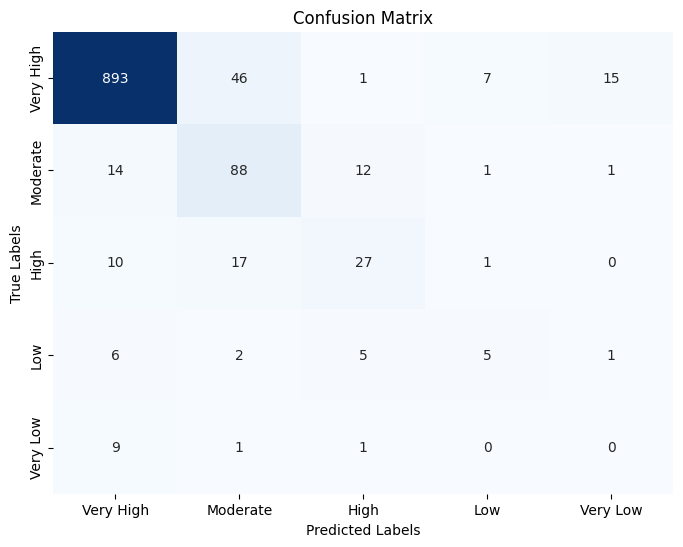

In [39]:
def test_set_evaluation(model, X_test, y_test_numeric, y_test_labels):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    test_metrics = {
        'Accuracy': accuracy_score(y_test_numeric, y_pred),
        'F1 Score': f1_score(y_test_numeric, y_pred, average='weighted'),
        'Precision': precision_score(y_test_numeric, y_pred, average='weighted'),
        'Recall': recall_score(y_test_numeric, y_pred, average='weighted'),
        'ROC AUC Score': roc_auc_score(y_test_numeric, y_pred_proba, multi_class='ovr', average='weighted')
    }

    print("\nTest Set Metrics:")
    for metric, score in test_metrics.items():
        print(f"{metric}: {score:.4f}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test_numeric, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=y_test_labels.unique(), yticklabels=y_test_labels.unique())
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate on Test Set
print("\nTest Set Evaluation for Best Random Forest Model:")
test_set_evaluation(best_model, X_test_scaled, y_test_numeric, y_test_labels)


During the evaluation of the Random Forest model, general metrics seemed strong, which supported that the model was good at predicting health impacts across the board.
However, the model faced challenges with certain underrepresented classes, which can be attributedto class imbalances in the dataset.

5.7 Feature Importance

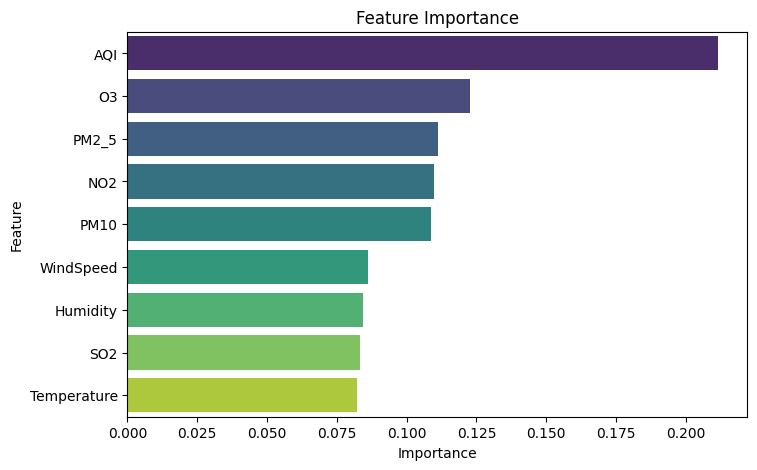

In [40]:
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_importance.png')
plt.show()


The most important features that contribute to predicting health impacts are the air quality indicator, or more precisely, the AQI, PM2.5, PM10, O3 and NO2. Among these, the AQI has the biggest responsibility. At a lower importance level, the meteorological features take their turn in contribution: Humidity, WindSpeed, Temperature.

## 6. Conclusion

The Random Forest-based model, developed in this research for estimating air quality in relation to human health, has shown excellent performance. It has achieved 86.67% accuracy and an F1 score of 87.04% on the test set, proving fairly efficient in categorizing air quality into five categories, namely 'very low', 'low', 'moderate', 'high', and 'very high'. Overall, the model performs with quite high accuracy and balanced metrics, which suggests that it reliably predicts categories of health impact without considerable bias.

Key predictors derived from the feature importance analysis are AQI, PM2.5, and PM10, further solidifying that they are the major factors to describe air quality.

Despite challenges with class imbalance, the Random Forest model presents a robust tool in health impact predictions, which would be refined further by adding more focus on class balance.



In [75]:
!git add Air-quality-health-prediction.ipynb